# Ant 2x4

In [1]:

import numpy as np

from utils import get_rewards_for_last_n_runs, average_and_confidence, plot_with_confidence_interval, plot_multiple_with_confidence_intervals
import os

/Users/Hunter/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [3]:
rewards = []
rewards_mal = []
for i in range(n):
    rewards.append(rewards_data[i][0])
    rewards_mal.append(rewards_data_mal[i][0])
    
avg_rewards, conf_rewards = average_and_confidence(rewards_data)
avg_rewards_mal, conf_rewards_mal = average_and_confidence(rewards_data_mal)

In [39]:
len(rewards_data[0]), len(rewards_data_mal[0])

(3, 3)

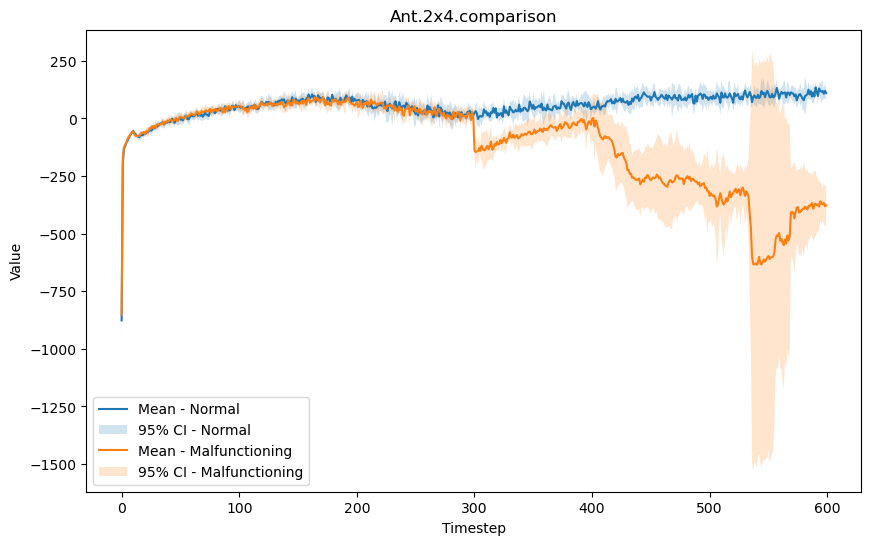

In [4]:
plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) ,save=True, title='Ant.2x4.comparison', labels= ['Normal', 'Malfunctioning'])

# Ant 4x2

In [5]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.4x2.0.001.350.0.99/'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [6]:
rewards = []
rewards_mal = []
for i in range(n):
    rewards.append(rewards_data[i][0])
    rewards_mal.append(rewards_data_mal[i][0])
    
avg_rewards, conf_rewards = average_and_confidence(rewards_data)
avg_rewards_mal, conf_rewards_mal = average_and_confidence(rewards_data_mal)

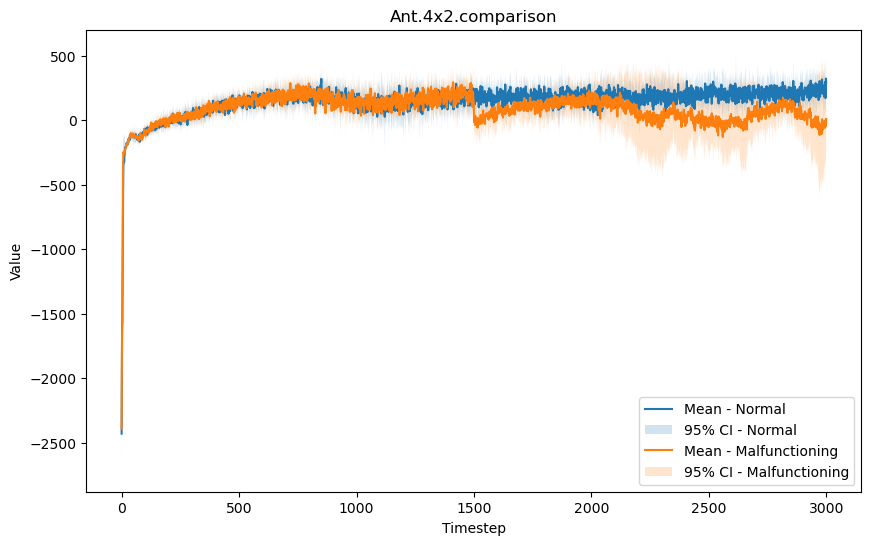

In [7]:
plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])

# Cheetah 3x2

In [24]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.2x3.0.001.350.0.99'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [25]:
rewards = []
# rewards_mal = []
for i in range(n):
    rewards.append(rewards_data[i][0])
    # rewards_mal.append(rewards_data_mal[i][0])
    
avg_rewards, conf_rewards = average_and_confidence(rewards_data)
# avg_rewards_mal, conf_rewards_mal = average_and_confidence(rewards_data_mal)

In [26]:
avg_rewards.shape, conf_rewards.shape

((300,), (300,))

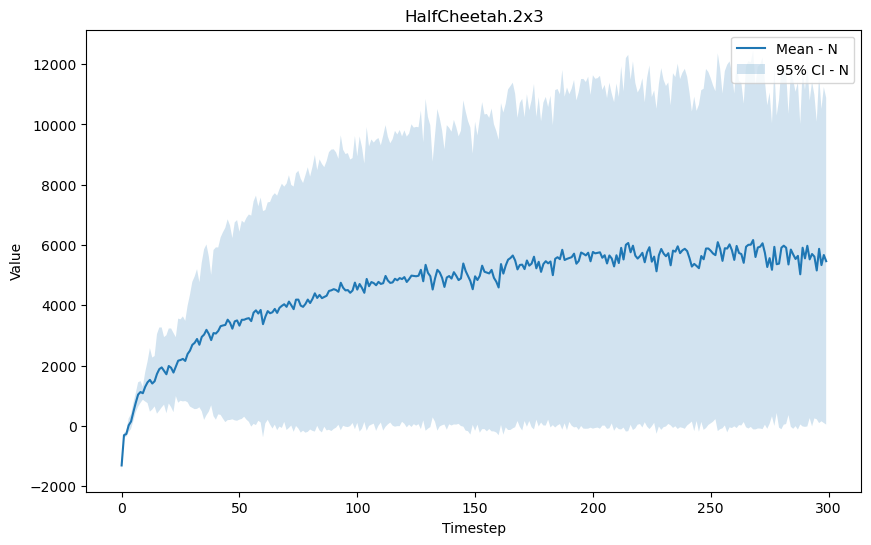

In [27]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.2x3', labels='Normal')

# Cheetah 6x1

In [35]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path1 ="/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.6x1.0.001.350.0.99/"
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path1, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [36]:
avg_rewards.shape, conf_rewards.shape

((300,), (300,))

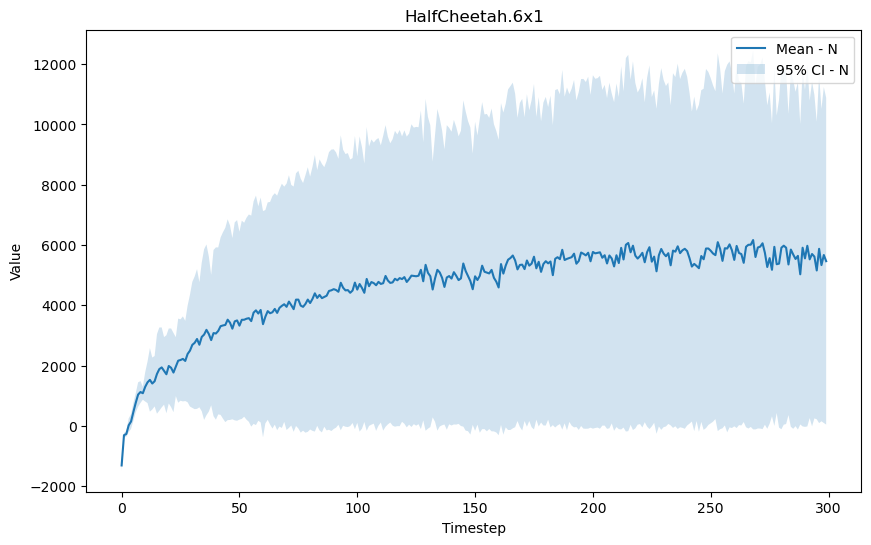

In [37]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.6x1', labels='Normal')

# Humanoid 

In [28]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Humanoid.9x8.0.001.350.0.99/'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [29]:
avg_rewards.shape, conf_rewards.shape

((300,), (300,))

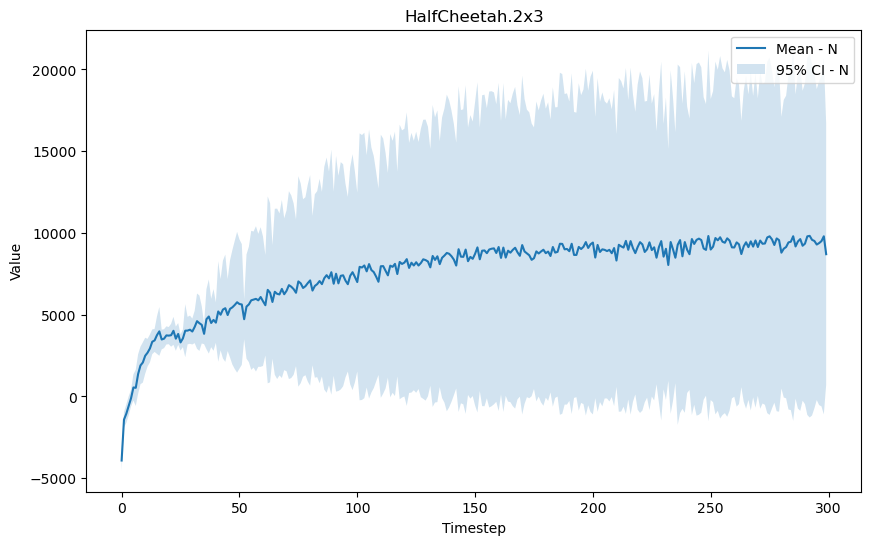

In [30]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.2x3', labels='Normal')

# Humanoid

In [ ]:
R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.6x1.0.001.350.0.99/', valid=False, aggrew=False, time=True)



In [ ]:
plt.plot(R0, label='R0')
plt.legend()

plt.xlabel('Episodes')
plt.ylabel('Value')
plt.title('Cheetah 6x1')
plt.savefig('../Multi-Agent/maddpg/experiments/plots/Cheetah6x1.png')
